# Universidad Central de Venezuela
## Facultad de Ciencias
### Escuela de Computación

**Mineria de datos**

**Presentación Final**

**Joiner Rojas**

**Dataset Utilizado:**  https://www.kaggle.com/datasets/moneystore/agencyperformance

In [257]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from scipy.stats import gaussian_kde

# Lee el archivo CSV
df = pd.read_csv('Insurance.csv')

# Muestra las primeras 10  filas del dfFrame en modo tabla
print("Primeras filas del dfFrame:")
display(df.head(10))

#Evalua cuantos registros tiene el dfset en un inicio
num_registros = df.shape[0]
display(f"El dataset tiene {num_registros} registros inicialmente")

# se uso para visualizar informacion con la extension de Vs code, Data Wrangler
df.head() 

Primeras filas del dfFrame:


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59
7,37,female,27.7,3,no,northwest,7281.51
8,37,male,29.8,2,no,northeast,6406.41
9,60,female,25.8,0,no,northwest,28923.14


'El dataset tiene 1338 registros inicialmente'

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


Planteamiento: Queremos conocer la proporcion de asegurados hombres y mujeres. 

Pasos a seguir:

1. Contar la Frecuencia de Cada Género.
2. Obtener el número de registros por género.
3. Graficar los resultados con un gráfico de Torta.

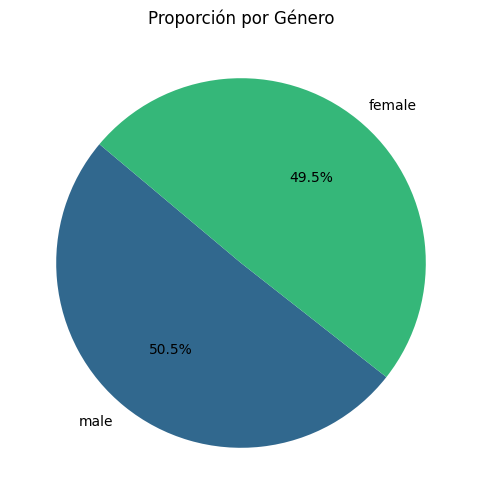

In [258]:

# Paso 1: Contar la Frecuencia de Cada Género
gender_counts = df['sex'].value_counts()

# Paso 3: Crear el Gráfico de Torta con Colores Vivos
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=sns.color_palette("viridis", len(gender_counts)), startangle=140)
plt.title('Proporción por Género')
plt.show()

Observaciones: se tiene que el 49,5% de la muestra son mujeres y el 50,5% de la muestra son hombres. Por lo que el dataset se encuentra bastante balanceada en términos de sexo.


Planteamiento: Se desea conocer en qué región se encuentran la mayor cantidad de asegurados.

Pasos a seguir:

1. Agrupar los datos por la columna región 
2. Contar la cantidad de registros por región.
3. Graficar los resultados con un gráfico de barras.

C:\Users\joine\AppData\Local\Temp\ipykernel_2656\2485019514.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='count', data=region_counts, palette='viridis')


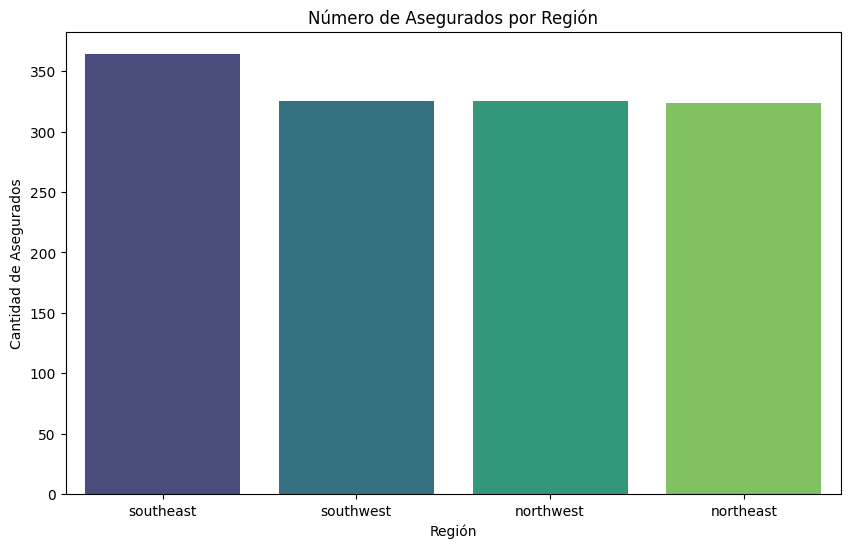

In [259]:
# Agrupar los datos por 'region' y contar la cantidad de registros por región
region_counts = df['region'].value_counts().reset_index()
region_counts.columns = ['region', 'count']

# Graficar los resultados con un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='count', data=region_counts, palette='viridis')
plt.title('Número de Asegurados por Región')
plt.xlabel('Región')
plt.ylabel('Cantidad de Asegurados')
plt.show()


Observaciones: La región southeast tiene el mayor número de asegurados, destacándose  sobre las demás regiones. Las regiones Southwest, Northwest y Northeast  tienen cantidades similares de asegurados, menores que southeast. En general, La región southeast presenta una diferencia notable en la cantidad de asegurados en comparación con las otras regiones, que tienen números bastante homogéneos entre sí.

Planteamiento: Se quiere estudiar los diferentes rangos de edades presentes en el dataset, asi poder notar visualmente si hay alguna tendencia.

Pasos a seguir:

1. Crear los rangos de edad. Podemos utilizar la función pd.cut de pandas para agrupar las edades.
2. Agrupar los datos por los rangos de edad y contar el número de registros en cada grupo.
3. Crear un gráfico de barras con los datos del conteo del paso anterior.

C:\Users\joine\AppData\Local\Temp\ipykernel_2656\3035459037.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette="viridis")


La edad mínima es: 18
La edad máxima es: 64


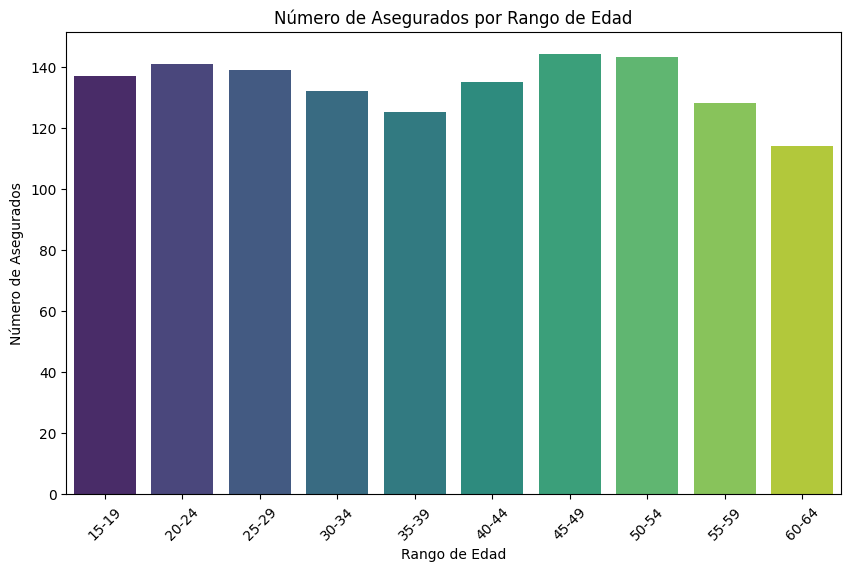

In [260]:
# Encontrar la edad mínima y máxima en el DataFrame
edad_minima = df['age'].min()
edad_maxima = df['age'].max()

print(f'La edad mínima es: {edad_minima}')
print(f'La edad máxima es: {edad_maxima}')


# Crear rangos de edad de 5 años
bins = range(15, 70, 5)  # Crear bins de 5 en 5 años
labels = [f'{i}-{i+4}' for i in bins[:-1]]
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Contar el número de asegurados en cada grupo de edad
age_group_counts = df['age_group'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette="viridis")
plt.xlabel('Rango de Edad')
plt.ylabel('Número de Asegurados')
plt.title('Número de Asegurados por Rango de Edad')
plt.xticks(rotation=45)
plt.show()


Observaciones: En general la cantidad de asegurados por rango de edad es bastante uniforme, sin embargo notamos una disminución en la cantidad de asegurados en los grupos correspondientes a personas mayores a 55 años, similar a la cantidad de personas entre 30 y 40 años

Planteamiento: Se quiere analizar cómo varía el gasto médico promedio en los diferentes intervalos de edad. El objetivo es identificar patrones en el gasto promedio en función de los grupos de edad definidos.

Pasos a seguir:

1. Agrupar los datos por rango de edad.
2. Calcular el Promedio de Gasto por rango.
3. Visualizar los Resultados en un grafico de barras.

C:\Users\joine\AppData\Local\Temp\ipykernel_2656\2316259262.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  promedio_gasto = df.groupby('age_group')['expenses'].mean().reset_index()


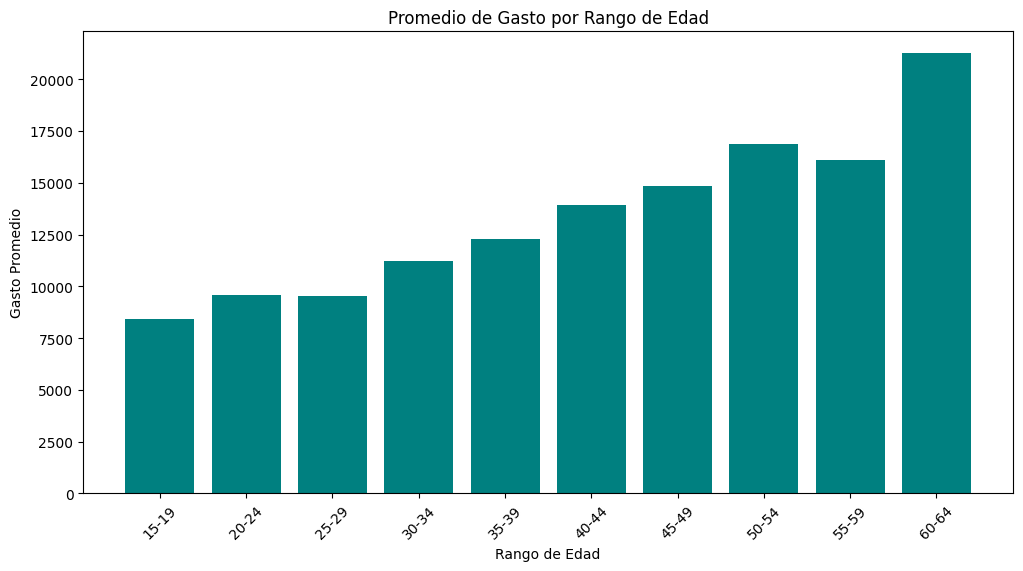

In [261]:
# Calcular el promedio de gasto por rango de edad
promedio_gasto = df.groupby('age_group')['expenses'].mean().reset_index()

# Graficar el promedio de gasto por rango de edad
plt.figure(figsize=(12, 6))
plt.bar(promedio_gasto['age_group'], promedio_gasto['expenses'], color='teal')
plt.title('Promedio de Gasto por Rango de Edad')
plt.xlabel('Rango de Edad')
plt.ylabel('Gasto Promedio')
plt.xticks(rotation=45)
plt.show()


Observacion: Hay una tendencia, el promedio de gasto medico por rango de edad sube considerablemente a medida que aumenta la edad.

Planteamiento: Se quiere analizar la correlación entre los rangos de edad y el gasto promedio para confirmar la observación del planteamiento anterior.

Pasos a seguir:

1. Convertir Rangos a Valores Numéricos.
2. Calcular el Promedio de Gasto por rango .
3. Calcular la Correlación de Pearson.

In [262]:

from scipy.stats import pearsonr

# Convertir los rangos de edad a valores numéricos (usar el valor medio de cada rango)
df['edad_rango_numeric'] = df['age_group'].apply(lambda x: int(x.split('-')[0]) + 2)

# Calcular el promedio de gasto por rango de edad
promedio_gasto = df.groupby('edad_rango_numeric')['expenses'].mean().reset_index()

# Calcular la correlación de Pearson entre los rangos de edad numéricos y el gasto promedio
correlation, _ = pearsonr(promedio_gasto['edad_rango_numeric'], promedio_gasto['expenses'])

print(f'Correlación de Pearson entre rango de edad y gasto promedio: {correlation:.2f}')


Correlación de Pearson entre rango de edad y gasto promedio: 0.97


C:\Users\joine\AppData\Local\Temp\ipykernel_2656\3683651393.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  promedio_gasto = df.groupby('edad_rango_numeric')['expenses'].mean().reset_index()


Observación: se confirma la observacion realizada en el planteamiento anterior, hay una correlación sumamente fuerte entre la edad de la persona y el gasto médico. Es decir, a medida que aumenta la edad, aumenta el gasto médico

Planteamiento: Queremos analizar la relación entre diferentes variables y el costo de los seguros médicos. Específicamente, queremos entender cómo el fumar, el sexo de la persona, y el índice de masa corporal (BMI) se correlacionan con el costo.

Pasos a seguir:

1. Codificar las Variables Categóricas (de momemto, solo para este análisis).
2. Calcular las Correlaciones utilizando el coheficiente de pearson.
3. Visualizar las Relaciones.
   - 3.1 Crear un gráfico de caja tanto para el caso de la relación entre fumar y el costo como para la relación entre sexo y el costo.
   - 3.2 Crear un gráfico de dispersión para la relación entre BMI y el costo.

Correlación entre fumar y el costo: 0.79
Correlación entre sexo y el costo: -0.06
Correlación entre BMI y el costo: 0.20


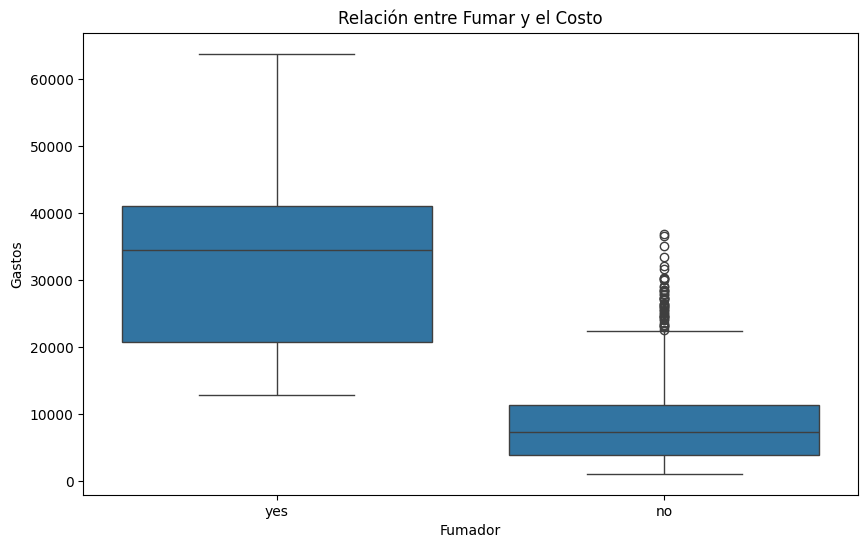

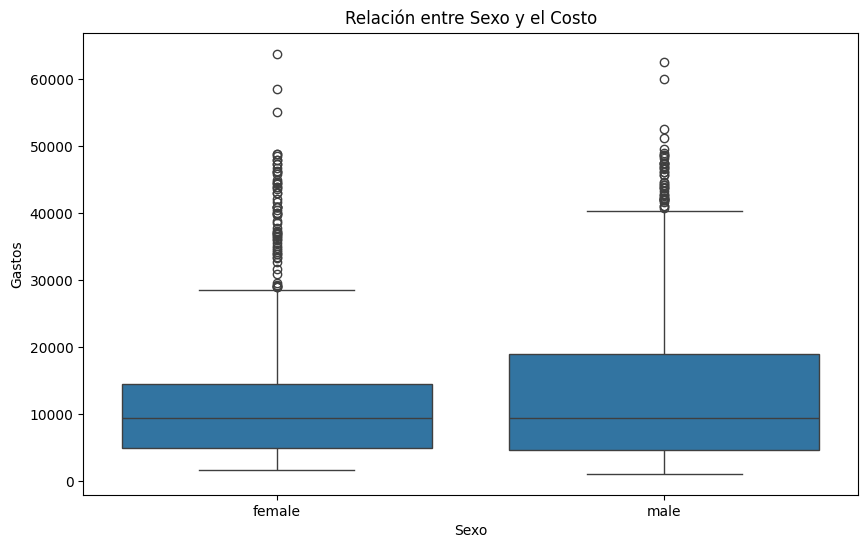

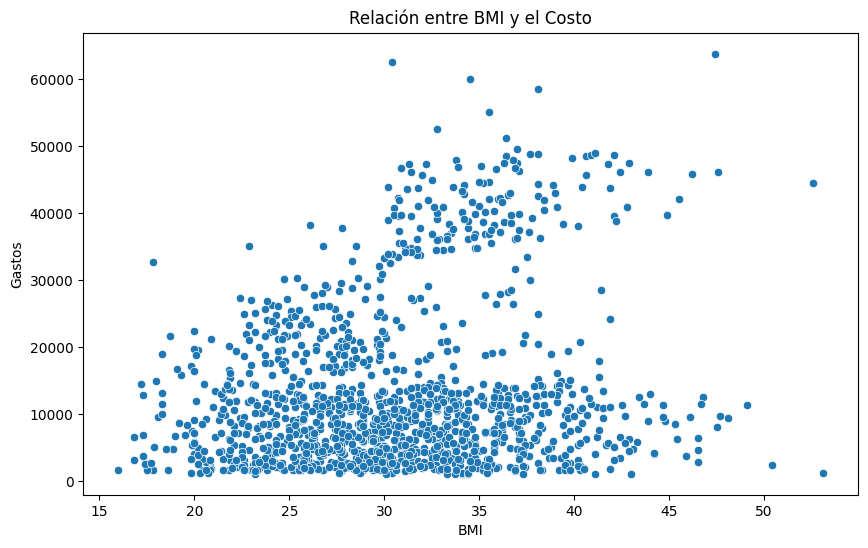

Primeras filas del dfFrame:


,age,sex,bmi,children,smoker,region,expenses,age_group,edad_rango_numeric
0,19,female,27.9,0,yes,southwest,16884.92,15-19,17
1,18,male,33.8,1,no,southeast,1725.55,15-19,17
2,28,male,33.0,3,no,southeast,4449.46,25-29,27
3,33,male,22.7,0,no,northwest,21984.47,30-34,32
4,32,male,28.9,0,no,northwest,3866.86,30-34,32
5,31,female,25.7,0,no,southeast,3756.62,30-34,32
6,46,female,33.4,1,no,southeast,8240.59,45-49,47
7,37,female,27.7,3,no,northwest,7281.51,35-39,37
8,37,male,29.8,2,no,northeast,6406.41,35-39,37
9,60,female,25.8,0,no,northwest,28923.14,60-64,62


In [263]:


# Codificación de las variables categóricas
df['sex_encoded'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker_encoded'] = df['smoker'].map({'no': 0, 'yes': 1})

# Calcular las correlaciones
correlation_smoker_expenses = df['smoker_encoded'].corr(df['expenses'])
correlation_sex_expenses = df['sex_encoded'].corr(df['expenses'])
correlation_bmi_expenses = df['bmi'].corr(df['expenses'])

print(f'Correlación entre fumar y el costo: {correlation_smoker_expenses:.2f}')
print(f'Correlación entre sexo y el costo: {correlation_sex_expenses:.2f}')
print(f'Correlación entre BMI y el costo: {correlation_bmi_expenses:.2f}')

# Visualización de la relación entre las variables

# Fumar vs Costo
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='expenses', data=df)
plt.title('Relación entre Fumar y el Costo')
plt.xlabel('Fumador')
plt.ylabel('Gastos')
plt.show()

# Sexo vs Costo
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='expenses', data=df)
plt.title('Relación entre Sexo y el Costo')
plt.xlabel('Sexo')
plt.ylabel('Gastos')
plt.show()

# BMI vs Costo
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='expenses', data=df)
plt.title('Relación entre BMI y el Costo')
plt.xlabel('BMI')
plt.ylabel('Gastos')
plt.show()

# Eliminar las columnas sex_encoded y smoker_encoded
df = df.drop(columns=['sex_encoded', 'smoker_encoded'])

# Muestra las primeras 10  filas del dfFrame en modo tabla
print("Primeras filas del dfFrame:")
display(df.head(10))

Observaciones: El indice de masa coporal (BMI)  tiene una correlación debil (baja) con los gastos médicos de la persona asegurada siendo de 0.20 al utilziar el coheficiente de pearson para calcularla, además esto es bastante notorio en el grafico de dispersión ya que no se nota ningun patrón en los puntos. Por otra parte en el caso del sexo, podemos observar que hay incluso correlación negativa, casi nula, lo cual significa que a medida que una variable aumenta la otra tiende a disminuir. Finalmente el hecho de que la persona asegurada sea fumador incide directamente en los gastos  de salud, pues estas dos variables tienen una correlacion fuerte, lo que indica que si una persona es fumadora es probable que sus gastos medicos sean mas altos, esto lo podemos observar graficamente al ver que la barra del "yes" esta mas alta que la del "no". En general podemos concluir que de las variabes estudiadas la unica que tiene una correlacion bastante directa, fuerte, con los gastos medicos es la que que indica si el paciente es fumador o no

Planteamiento: Se Quiere analizar cómo se distribuyen los gastos médicos en diferentes regiones para identificar patrones o diferencias significativas en los costos por región.

Pasos:

1. Agrupar por Región y Calcular el promedio de gastos médicos para cada región.
2. Graficar Resultados con un gráfico de barras que muestre el promedio de gastos médicos para cada región.

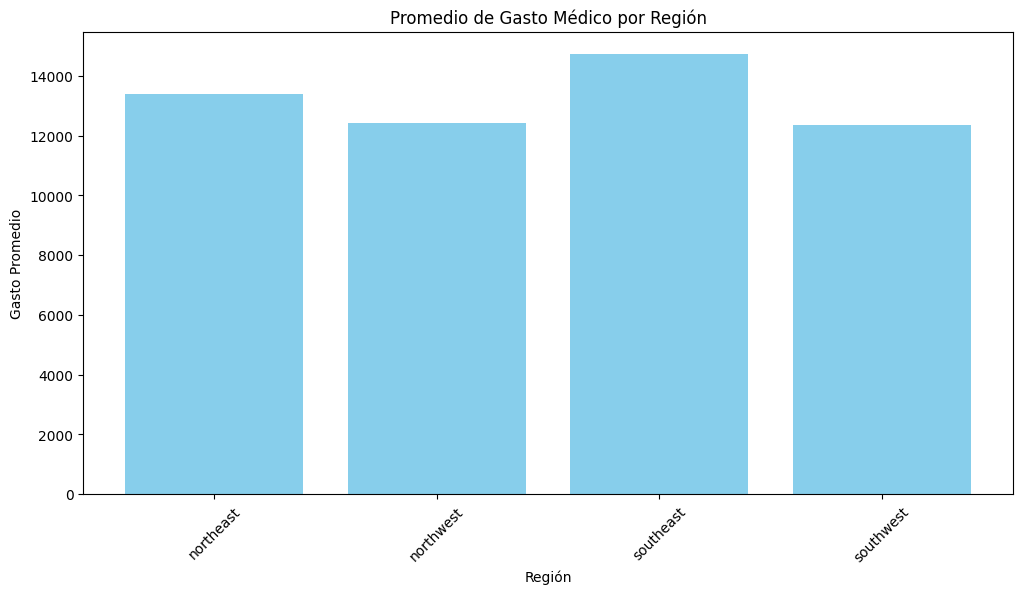

In [264]:
# Calcular el promedio de gasto por región
promedio_gasto_region = df.groupby('region')['expenses'].mean().reset_index()

# Graficar el promedio de gasto por región
plt.figure(figsize=(12, 6))
plt.bar(promedio_gasto_region['region'], promedio_gasto_region['expenses'], color='skyblue')
plt.title('Promedio de Gasto Médico por Región')
plt.xlabel('Región')
plt.ylabel('Gasto Promedio')
plt.xticks(rotation=45)
plt.show()


Observaciones: El gasto por región no es considerablemente diferente, sin embargo destaca que southeast es la región con mayor gasto médico, mientras northwest y southwest tienen el gato médico mas bajo, siendo entonces northeast la región con gasto promedio en comparación a las otras.

Utilizando la herramienta data Wrangler en Vs code, pudimos hacer una primera inspeccion de los datos, esto permitio tener una idea de la estructura y contenido del dataset y ademas confirmar la no existencia de valores nulos en las diferentes variables 

Podemos observar que no hay requerimientos estructurales que deban ser atendidos con preporcesameinto estructural, por lo que el siguiente pasos seria realizar operaciones de preprocesamiento funcional 

PLanteamiento: Codificar las variables categóricas, por inspección podemos determinar que estas son 'sex''smoker' y 'region'

In [265]:
# Codificar las variables categóricas
categorical_columns = ['sex', 'smoker', 'region']
encoding_map = {}

for col in categorical_columns:
    df[col] = pd.factorize(df[col])[0]
    encoding_map[col] = dict(enumerate(pd.factorize(df[col])[1]))

# Imprimir la correspondencia de la codificación
for col, mapping in encoding_map.items():
    print(f'Codificación para {col}:')
    for key, value in mapping.items():
        print(f'  {value} -> {key}')

# Muestra las primeras 10  filas del dfFrame en modo tabla
print("Primeras filas del dfFrame:")
display(df.head(10))

Codificación para sex:
  0 -> 0
  1 -> 1
Codificación para smoker:
  0 -> 0
  1 -> 1
Codificación para region:
  0 -> 0
  1 -> 1
  2 -> 2
  3 -> 3
Primeras filas del dfFrame:


,age,sex,bmi,children,smoker,region,expenses,age_group,edad_rango_numeric
0,19,0,27.9,0,0,0,16884.92,15-19,17
1,18,1,33.8,1,1,1,1725.55,15-19,17
2,28,1,33.0,3,1,1,4449.46,25-29,27
3,33,1,22.7,0,1,2,21984.47,30-34,32
4,32,1,28.9,0,1,2,3866.86,30-34,32
5,31,0,25.7,0,1,1,3756.62,30-34,32
6,46,0,33.4,1,1,1,8240.59,45-49,47
7,37,0,27.7,3,1,2,7281.51,35-39,37
8,37,1,29.8,2,1,3,6406.41,35-39,37
9,60,0,25.8,0,1,2,28923.14,60-64,62


Ya se codificaron las varibles categoricas, se imprimio por consola la correspondencia, esto con fines de conocerla en detalle, es factible hacer esto al tratarse de un dataset pequeño, el cual permite una inspeccion mas intuitiva. 


Planteamiento:Se quiere normalizar los valores de la edad y lo que se le cobro al cliente por el seguro, lo cual son las variables 'age' y 'expenses' respectivamente. No se aplicará esto a la variable del indice de masa corporal 'bmi' porque , aunque es candidata, es prudente hacer otras operaciones sobre la misma, por lo que es requerido mantener le valor original

Primero se checkeara que la variable no siga una distibucion normal, esto a traves de inspeccion visual utilizando un grafico  y de cumplirse, luego se normalizara siguiendo la siguiente formula: 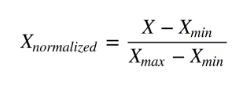

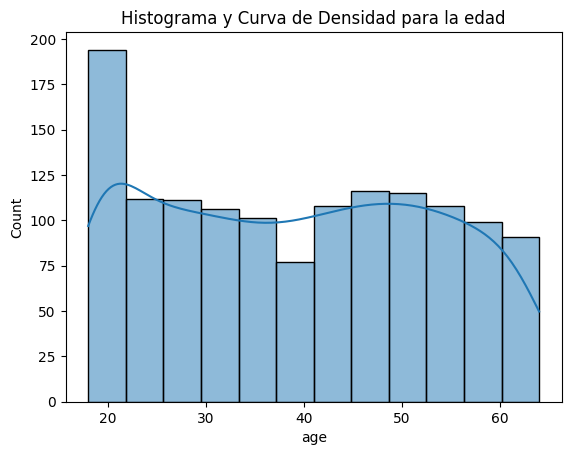

In [266]:
# Selecciona la columna 'age' para el análisis
data = df['age']

# 1. Histograma y Curva de Densidad
sns.histplot(data, kde=True)
plt.title('Histograma y Curva de Densidad para la edad')
plt.show()

In [267]:
# Calcular los valores mínimos y máximos
min_age = df['age'].min()
max_age = df['age'].max()

min_expenses = df['expenses'].min()
max_expenses = df['expenses'].max()

# Aplicar la normalización
df['age'] = (df['age'] - min_age) / (max_age - min_age)
df['expenses'] = (df['expenses'] - min_expenses) / (max_expenses - min_expenses)

# Mostrar las primeras 10 filas del DataFrame en modo tabla
print("\nPrimeras filas del DataFrame:")
display(df.head(10))





Primeras filas del DataFrame:


,age,sex,bmi,children,smoker,region,expenses,age_group,edad_rango_numeric
0,0.021739,0,27.9,0,0,0,0.251611,15-19,17
1,0.000000,1,33.8,1,1,1,0.009636,15-19,17
2,0.217391,1,33.0,3,1,1,0.053115,25-29,27
3,0.326087,1,22.7,0,1,2,0.333010,30-34,32
4,0.304348,1,28.9,0,1,2,0.043816,30-34,32
5,0.282609,0,25.7,0,1,1,0.042056,30-34,32
6,0.608696,0,33.4,1,1,1,0.113629,45-49,47
7,0.413043,0,27.7,3,1,2,0.098321,35-39,37
8,0.413043,1,29.8,2,1,3,0.084352,35-39,37
9,0.913043,0,25.8,0,1,2,0.443766,60-64,62


Se normlizaron correctamente ls valores de la edad y las expensas, por lo que ahora tenemos valores entre 0 y 1 que facilitan el calculo en operaciones futuras

Planteamiento: Se desea categorizar la variable BMI, ya que clicamente el indice de masa corporal tiene rangos establecidos que establecen la condicion fisica del paciente en cuanto a su peso, en este caso tomaremos como referencia clinica los siguientes rangos:

0<='bmi'<=18.5 : 'Underweight'
18.5<'bmi'<=24.9  :'Normal' 
24.9<'bmi'<=29.9 : 'Overweight'
29.9<='bmi'<=100  : 'Obese' 

In [268]:
import pandas as pd

# Crear una nueva columna 'bmi_category' basada en el valor de 'bmi'
df['bmi'] = pd.cut(df['bmi'], bins=[0, 18.5, 24.9, 29.9, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Mostrar las primeras 10 filas del DataFrame en modo tabla
print("\nPrimeras filas del DataFrame:")
display(df.head(10))

# se uso para visualizar informacion con la extension de Vs code, Data Wrangler
df.head() 


Primeras filas del DataFrame:


,age,sex,bmi,children,smoker,region,expenses,age_group,edad_rango_numeric
0,0.021739,0,Overweight,0,0,0,0.251611,15-19,17
1,0.000000,1,Obese,1,1,1,0.009636,15-19,17
2,0.217391,1,Obese,3,1,1,0.053115,25-29,27
3,0.326087,1,Normal,0,1,2,0.333010,30-34,32
4,0.304348,1,Overweight,0,1,2,0.043816,30-34,32
5,0.282609,0,Overweight,0,1,1,0.042056,30-34,32
6,0.608696,0,Obese,1,1,1,0.113629,45-49,47
7,0.413043,0,Overweight,3,1,2,0.098321,35-39,37
8,0.413043,1,Overweight,2,1,3,0.084352,35-39,37
9,0.913043,0,Overweight,0,1,2,0.443766,60-64,62


,age,sex,bmi,children,smoker,region,expenses,age_group,edad_rango_numeric
0,0.021739,0,Overweight,0,0,0,0.251611,15-19,17
1,0.000000,1,Obese,1,1,1,0.009636,15-19,17
2,0.217391,1,Obese,3,1,1,0.053115,25-29,27
3,0.326087,1,Normal,0,1,2,0.333010,30-34,32
4,0.304348,1,Overweight,0,1,2,0.043816,30-34,32


Hemos categorizado correctamente la variable que indica el indice de masa corporal

Planteamiento: Posterior a que hemos categorizado los valores de la variable numerica 'bmi' , entonces es prudente codificar la misma para llevarla a un valor numerico codificado.

In [269]:
# Codificación para variable categorica 'bmi'
label_encoder_region = LabelEncoder()
df['bmi'] = label_encoder_region.fit_transform(df['bmi'])

# Mostrar las primeras 10 filas del DataFrame en modo tabla
print("\nPrimeras filas del DataFrame:")
display(df.head(10))



Primeras filas del DataFrame:


,age,sex,bmi,children,smoker,region,expenses,age_group,edad_rango_numeric
0,0.021739,0,2,0,0,0,0.251611,15-19,17
1,0.000000,1,1,1,1,1,0.009636,15-19,17
2,0.217391,1,1,3,1,1,0.053115,25-29,27
3,0.326087,1,0,0,1,2,0.333010,30-34,32
4,0.304348,1,2,0,1,2,0.043816,30-34,32
5,0.282609,0,2,0,1,1,0.042056,30-34,32
6,0.608696,0,1,1,1,1,0.113629,45-49,47
7,0.413043,0,2,3,1,2,0.098321,35-39,37
8,0.413043,1,2,2,1,3,0.084352,35-39,37
9,0.913043,0,2,0,1,2,0.443766,60-64,62


El dataset se encuentra totalmente codificado y normalizado, listo entonces para la etapa de análisis exploratorio de datos

In [270]:
# Eliminar las columnas sex_encoded y smoker_encoded
df = df.drop(columns=['edad_rango_numeric'])

# Eliminar las columnas sex_encoded y smoker_encoded
df = df.drop(columns=['age_group'])



# Mostrar las primeras 10 filas del DataFrame en modo tabla
print("\nPrimeras filas del DataFrame:")
display(df.head(10))

df.head()


Primeras filas del DataFrame:


,age,sex,bmi,children,smoker,region,expenses
0,0.021739,0,2,0,0,0,0.251611
1,0.000000,1,1,1,1,1,0.009636
2,0.217391,1,1,3,1,1,0.053115
3,0.326087,1,0,0,1,2,0.333010
4,0.304348,1,2,0,1,2,0.043816
5,0.282609,0,2,0,1,1,0.042056
6,0.608696,0,1,1,1,1,0.113629
7,0.413043,0,2,3,1,2,0.098321
8,0.413043,1,2,2,1,3,0.084352
9,0.913043,0,2,0,1,2,0.443766


,age,sex,bmi,children,smoker,region,expenses
0,0.021739,0,2,0,0,0,0.251611
1,0.000000,1,1,1,1,1,0.009636
2,0.217391,1,1,3,1,1,0.053115
3,0.326087,1,0,0,1,2,0.333010
4,0.304348,1,2,0,1,2,0.043816


### ALGORITMOS

Planteamiento: Durante le EDA pudimos observar como las diferente variables inciden sobre los gastos medicos,y que algunas de ellas tienen uuna relacion sumamente fuerte con la misma.Por eso se considera oportuno aplicar regresión lineal para predecir el valor que tendra 'expences' e base a las otras variables.

Objetivo general : El objetivo es predecir los gastos médicos (expenses) en función de características demográficas y de estilo de vida.


Se escogio regresión lineal porque es adecuado para modelar relaciones lineales entre una variable dependiente y varias independientes:

- Variable Dependiente: expenses (gastos médicos) es la variable que queremos predecir.
- Variables Independientes: age, sex, bmi, children, smoker, y region son las características que pueden influir en los gastos médicos.


In [271]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Suponiendo que df es tu DataFrame preprocesado

# Definir las variables independientes (X) y la variable dependiente (y)
X = df.drop('expenses', axis=1)
y = df['expenses']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Mostrar los coeficientes del modelo
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


Mean Squared Error: 0.009573171975752524
R-squared: 0.7579807112594465
          Coefficient
age          0.201311
sex          0.000825
bmi         -0.006547
children     0.006464
smoker      -0.377425
region      -0.000464


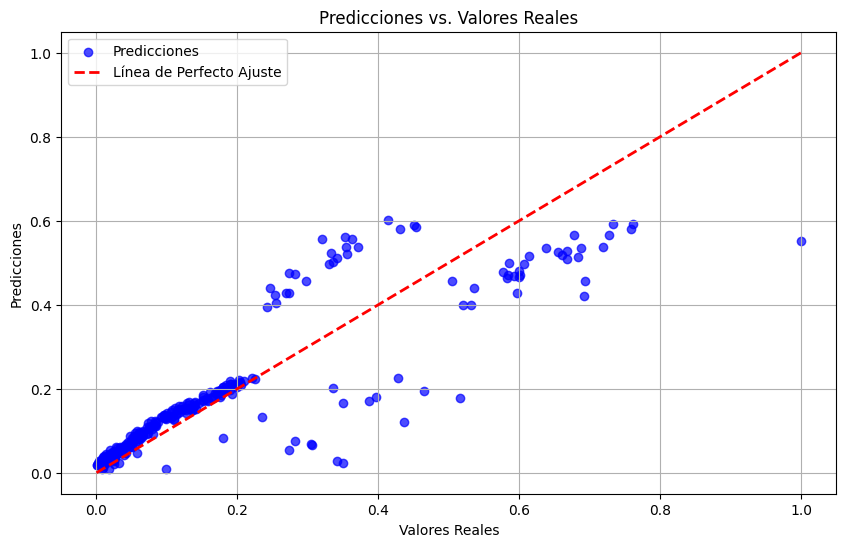

In [272]:
import matplotlib.pyplot as plt

# Graficar Predicciones vs. Valores Reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Línea de Perfecto Ajuste')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.legend()
plt.grid(True)
plt.show()


Interpretación de la Gráfica
Puntos Azules (Predicciones): Cada punto representa una predicción hecha por el modelo frente al valor real de expenses en el conjunto de prueba (y_test).
Línea Roja (Línea de Perfecto Ajuste): Esta línea muestra dónde estarían los puntos si las predicciones fueran perfectas. Todos los puntos deberían estar cerca de esta línea si el modelo es bueno.
Observaciones:
Si los puntos están distribuidos aleatoriamente alrededor de la línea roja, indica que el modelo está funcionando bien.
Si hay patrones claros en la distribución de los puntos o si muchos puntos están alejados de la línea, podría indicar que el modelo no se ajusta bien a los datos.

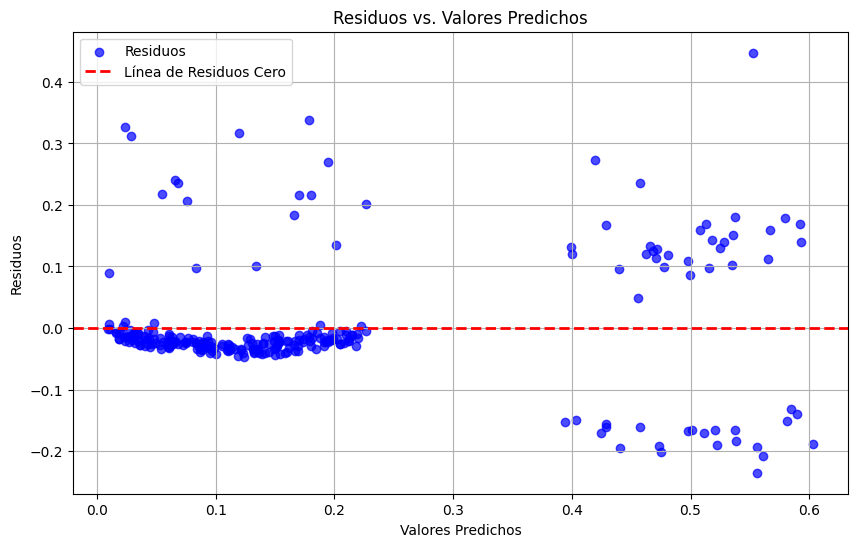

In [273]:
# Calcular los residuos
residuals = y_test - y_pred

# Graficar Residuos vs. Valores Predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='blue', label='Residuos')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Línea de Residuos Cero')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Residuos vs. Valores Predichos')
plt.legend()
plt.grid(True)
plt.show()


CASO DE PRUEBA

In [280]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Datos del caso de prueba
case_test = pd.DataFrame({
    'age': [61],
    'sex': ['female'],
    'bmi': [29.1],
    'children': [0],
    'smoker': ['yes'],
    'region': ['northwest']
})

# Normalizar 'age' usando los valores mínimos y máximos del DataFrame general
case_test['age'] = (case_test['age'] - min_age) / (max_age - min_age)

# Codificar 'bmi', 'sex', 'smoker', y 'region' (deberías usar el codificador adecuado en el caso real)
# Aquí se usan valores ficticios para ilustrar, pero deberías utilizar los codificadores entrenados con los datos originales.
case_test['bmi'] = 2
case_test['sex'] = 0
case_test['smoker'] = 1
case_test['region']= 2

# Asegurarse de que el DataFrame de prueba tenga las mismas columnas que el DataFrame de entrenamiento
for col in X.columns:
    if col not in case_test.columns:
        case_test[col] = 0
case_test = case_test[X.columns]

# Imprimir el caso de prueba justo antes de aplicar la predicción
print("Datos del Caso de Prueba Preparado:")
print(case_test)

# Realizar la predicción
predicted_expenses = model.predict(case_test)


print(f"Predicted Expenses: {predicted_expenses}")

# Desnormalizar el valor de expenses

predicted_expenses_desnormalized = predicted_expenses[0] * (max_expenses - min_expenses) + min_expenses

print(f"Predicted Expenses desnormalize: {predicted_expenses_desnormalized}")


Datos del Caso de Prueba Preparado:
        age  sex  bmi  children  smoker  region
0  0.934783    0    2         0       1       2
Predicted Expenses: [0.19880513]
Predicted Expenses desnormalize: 13576.725371593013


In [278]:
from sklearn.metrics.pairwise import euclidean_distances

# Obtener los datos de características del DataFrame original
df_features = df.drop(columns=['expenses'])

# Calcular la distancia euclidiana entre el caso de prueba y todos los casos en el DataFrame
distances = euclidean_distances(case_test, df_features)

# Añadir la distancia al DataFrame original para seleccionar los casos más similares
df['distance'] = distances[0]

# Seleccionar los casos más similares (por ejemplo, los 5 casos más cercanos)
most_similar_cases = df.nsmallest(5, 'distance')

# Mostrar los casos más similares
print("Casos más similares:")
print(most_similar_cases[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses', 'distance']])


Casos más similares:
           age  sex  bmi  children  smoker  region  expenses  distance
9     0.913043    0    2         0       1       2  0.443766  0.021739
287   0.978261    0    2         0       1       2  0.209651  0.043478
1125  0.978261    0    2         0       1       2  0.209626  0.043478
575   0.869565    0    2         0       1       2  0.177195  0.065217
1237  0.869565    0    2         0       1       2  0.177218  0.065217
